## 在线性回归模型中使用梯度下降法

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [18]:
X = x.reshape(-1, 1)

In [19]:
X[:20]

array([[ 1.46663245],
       [ 0.02609767],
       [ 0.22351208],
       [ 1.11212096],
       [ 1.7617713 ],
       [ 0.93237747],
       [ 0.66409509],
       [ 1.98327859],
       [ 0.15524749],
       [ 1.99045805],
       [ 0.49647986],
       [ 1.94310077],
       [ 0.43211237],
       [ 1.12145533],
       [ 0.90197898],
       [ 1.91153379],
       [ 1.27975434],
       [ 0.75169023],
       [ 0.4734056 ],
       [ 1.26577495]])

In [20]:
y[:20]

array([  9.6680328 ,   3.67967744,   5.04341395,   7.34966865,
         9.13762517,   6.80987821,   4.77797728,  10.07113767,
         5.6524662 ,  11.32559069,   4.64074288,   9.86896602,
         6.17028614,   8.54104323,   7.19398803,  10.79120467,
         6.13305223,   6.73025494,   5.27770048,   6.54877723])

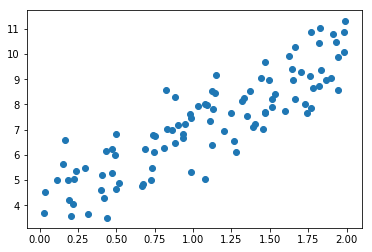

In [21]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

![formula1](formula/formula1.png)

In [22]:
def J(theta, X_b, y):
    return np.sum((y - X_b.dot(theta))**2) / len(y)

In [23]:
def dJ(theta, X_b, y):
    res = [0] * len(theta)
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return np.array(res) * 2 / len(X_b)

In [24]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [25]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [26]:
theta

array([ 4.06657827,  2.94085448])